In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
df = pd.read_csv('data_galton.csv', header='infer')
df.head(5)

,child,parent
0,61.7,70.5
1,61.7,68.5
2,61.7,65.5
3,61.7,64.5
4,61.7,64.0


In [3]:
myTable = pd.crosstab(df.parent, df.child)

myTable

child,61.7,62.2,63.2,64.2,65.2,66.2,67.2,68.2,69.2,70.2,71.2,72.2,73.2,73.7
parent,,,,,,,,,,,,,,
64.0,1,0,2,4,1,2,2,1,1,0,0,0,0,0
64.5,1,1,4,4,1,5,5,0,2,0,0,0,0,0
65.5,1,0,9,5,7,11,11,7,7,5,2,1,0,0
66.5,0,3,3,5,2,17,17,14,13,4,0,0,0,0
67.5,0,3,5,14,15,36,38,28,38,19,11,4,0,0
68.5,1,0,7,11,16,25,31,34,48,21,18,4,3,0
69.5,0,0,1,16,4,17,27,20,33,25,20,11,4,5
70.5,1,0,1,0,1,1,3,12,18,14,7,4,3,3
71.5,0,0,0,0,1,3,4,3,5,10,4,9,2,2


In [4]:
nrows = myTable.shape[0]

ncols = myTable.shape[1]

childsHeights = list(myTable.columns)

parentHeights = list(myTable.index)

combo = [ (x, y, myTable.loc[x, y]) for x in parentHeights for y in childsHeights]

combo = pd.DataFrame(combo, columns=['x', 'y', 'freq'])

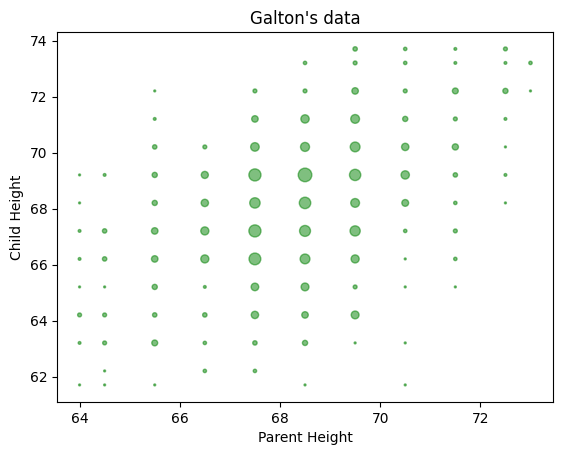

In [5]:
plt.scatter(combo.x, combo.y, s = combo.freq * 2, c='green', alpha=0.5)

plt.xlabel('Parent Height')

plt.ylabel('Child Height')

plt.title("Galton's data")
          
plt.show()

In [6]:
lm = LinearRegression(fit_intercept=True)

lm.fit(df[['parent']], df['child'])


LinearRegression()

In [7]:
lm.intercept_

23.941530180412848

In [8]:
lm.coef_

array([0.64629058])

In [9]:
predY = lm.predict(df[['parent']])

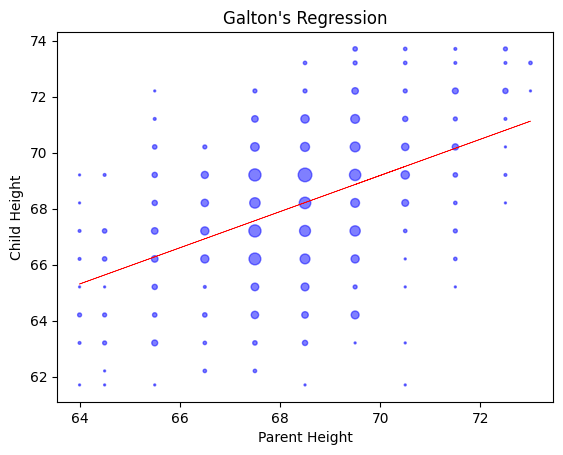

In [14]:
plt.plot(df.parent.values, predY, c = 'red', linestyle='-', linewidth=0.5)
plt.scatter(combo.x, combo.y, s = combo.freq * 2, c='blue', alpha=0.5)
plt.xlabel('Parent Height')
plt.ylabel('Child Height')
plt.title("Galton's Regression")
plt.show()